# Multiple linear regression analysis 

## Running competition dataset

The data was obtained from a run competition. There were 31 participants. The variables are:

**age: age of the person**

**weight: weight of the person (in kg)**

**runtime: time necessary to run 1.5 miles**

**rstpulse: pulse rate in rest**

**runpulse: pulse rate at the end of the 1.5 miles**

**maxpulse: maximum pulse rate while running**

**oxygen: oxygen consumption, expressed in mL/kg/min.**


The goal is to model the rate of oxygen consumption by using the other variables in the data. Then, use the model to predict the rate of oxygen consumption for an individual.

In [1]:
# import the data set
data <- read.table(file="/mnt/c/Users/Nnamdi/Desktop/Bioinformatics/Univariate_data_modelling/data/UDM/runtest.txt", header  = T)

In [2]:
run.df = data.frame(data)

In [3]:
head(run.df, n=10)

,age,weight,runtime,rstpulse,maxpulse,oxygen
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,57,73.37,12.63,58,176,39.407
2,54,79.38,11.17,62,165,46.080
3,52,76.32,9.63,48,166,45.441
4,50,70.87,8.92,48,155,54.625
5,51,67.25,11.08,48,172,45.118
6,54,91.63,12.88,44,172,39.203
7,51,73.71,10.47,59,188,45.790
8,57,59.08,9.93,49,155,50.545
9,49,76.32,9.40,56,188,48.673


 Descriptive statistics

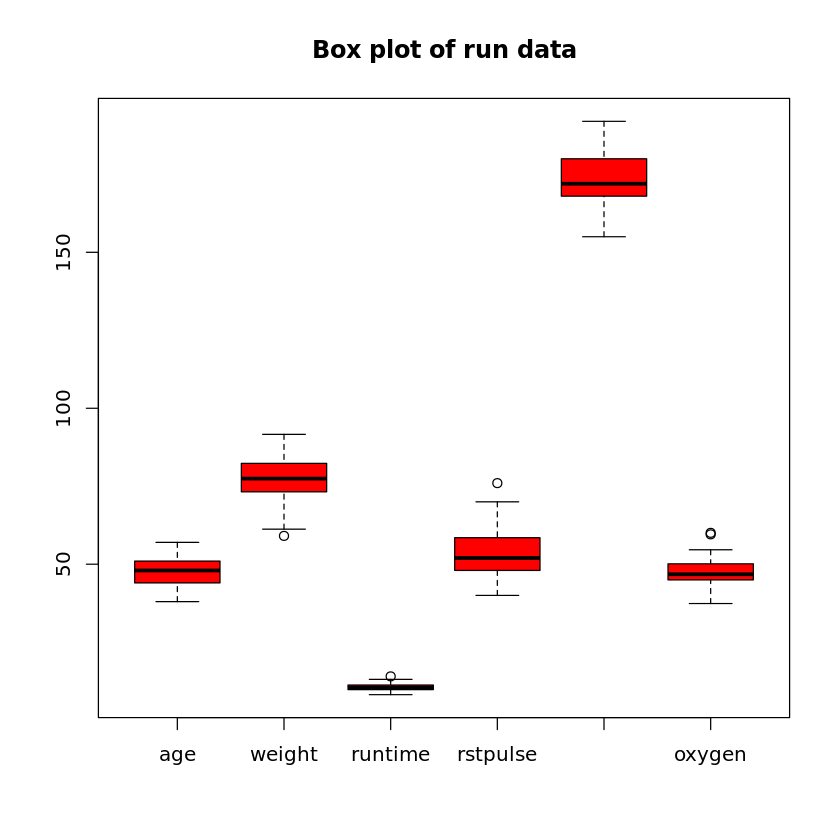

In [4]:
boxplot(run.df, col = "red", main = "Box plot of run data")

### Correlation analysis

In [5]:
# test for normality of the variables with Shapiro wilk test
apply(run.df, 2, FUN = shapiro.test)

$age

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.9704, p-value = 0.5302


$weight

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97993, p-value = 0.8106


$runtime

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.97359, p-value = 0.6223


$rstpulse

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.94694, p-value = 0.1285


$maxpulse

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.96983, p-value = 0.5143


$oxygen

	Shapiro-Wilk normality test

data:  newX[, i]
W = 0.95366, p-value = 0.1968



 Null hypothesis of shapiro test : data has normal distribution
 
 Alternative hypothesis of shapiro test : data does not have normal distribution

Since the p-values are all above 0.05, **Spearman correlation** test will be used

,age,weight,runtime,rstpulse,maxpulse,oxygen
age,1.0000000,-0.16152291,0.15882750,-0.11176594,-0.3868154,-0.18351152
weight,-0.1615229,1.00000000,0.07482857,-0.03099386,0.1425983,-0.09318274
runtime,0.1588275,0.07482857,1.00000000,0.48010985,0.2058022,-0.80806452
rstpulse,-0.1117659,-0.03099386,0.48010985,1.00000000,0.3202324,-0.37542119
maxpulse,-0.3868154,0.14259833,0.20580218,0.32023244,1.0000000,-0.32238962
oxygen,-0.1835115,-0.09318274,-0.80806452,-0.37542119,-0.3223896,1.00000000


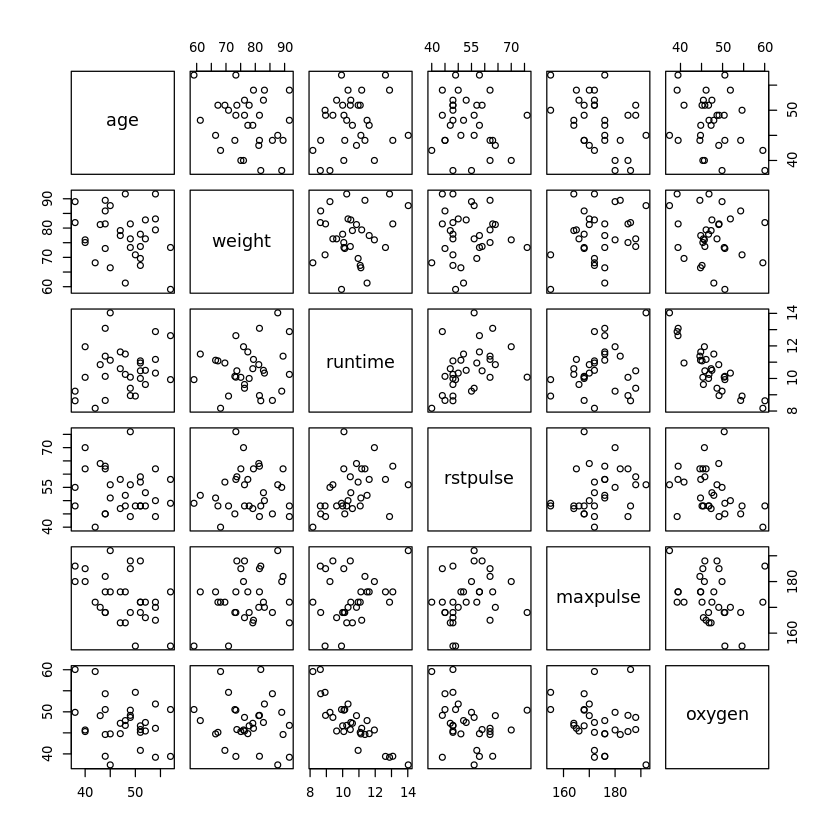

In [6]:
pairs(run.df)
run.cor <- cor(run.df, method = "spearman")
run.cor


In [7]:
cor.test(formula = ~ age + oxygen, data=run.df, method = "spearman", exact = F)


	Spearman's rank correlation rho

data:  age and oxygen
S = 5870.2, p-value = 0.3231
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1835115 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value > 0.05, there is no significant correlation between age and oxygen consumption


In [8]:
cor.test(formula = ~ weight + oxygen, data=run.df, method = "spearman", exact = F)


	Spearman's rank correlation rho

data:  weight and oxygen
S = 5422.2, p-value = 0.6181
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.09318274 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value > 0.05, there is no significant correlation between weight and oxygen cosumption


In [9]:
cor.test(formula = ~ runtime + oxygen, data=run.df, method = "spearman", exact = F)


	Spearman's rank correlation rho

data:  runtime and oxygen
S = 8968, p-value = 3.87e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.8080645 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value < 0.05, there is significant negative correlation between runtime and oxygen consumption.

This is logical since a higher runtime implies slower speed of running hence less oxygen consumption by the runner


In [10]:
cor.test(formula = ~ rstpulse + oxygen, data=run.df, method = "spearman", exact = F)


	Spearman's rank correlation rho

data:  rstpulse and oxygen
S = 6822.1, p-value = 0.03742
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3754212 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value < 0.05, there is significant negative correlation between rstpulse and oxygen consumption


In [11]:
cor.test(formula = ~ maxpulse + oxygen, data=run.df, method = "spearman", exact = F)


	Spearman's rank correlation rho

data:  maxpulse and oxygen
S = 6559.1, p-value = 0.07693
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3223896 


null hypothesis: there is no correlation

alternative hypotheis: there is correlation (either positive of negative)

Since the p-value > 0.05, there is no significant correlation between maxpulse and oxygen consumption


## Linear regression 

In [12]:
run.lm = lm(oxygen~.,data = run.df)
summary(run.lm)


Call:
lm(formula = oxygen ~ ., data = run.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0843 -1.4483  0.0672  1.2994  5.6408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.79397   14.14819   7.760 4.07e-08 ***
age          -0.25279    0.11473  -2.203    0.037 *  
weight       -0.04811    0.06269  -0.767    0.450    
runtime      -2.90391    0.42622  -6.813 3.85e-07 ***
rstpulse     -0.02553    0.06730  -0.379    0.708    
maxpulse     -0.08360    0.06408  -1.305    0.204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.69 on 25 degrees of freedom
Multiple R-squared:  0.7874,	Adjusted R-squared:  0.7449 
F-statistic: 18.52 on 5 and 25 DF,  p-value: 1.082e-07


## Model diagnostics 
### Check if the estimated regression model fulfils the underlying assumptions of linear regression

Linear regression uses the following assumptions: linear relationship between the response and independent variables, normality of distribution, independence of observations, constant variance in the residuals and absence of influential outliers.

1. Check for linearity by plotting (standardized) residuals versus fitted response. Alternatively, plot the(standardized) residuals versus each regressor. Linearity is fulfilled if there is random distribution of points in the plots

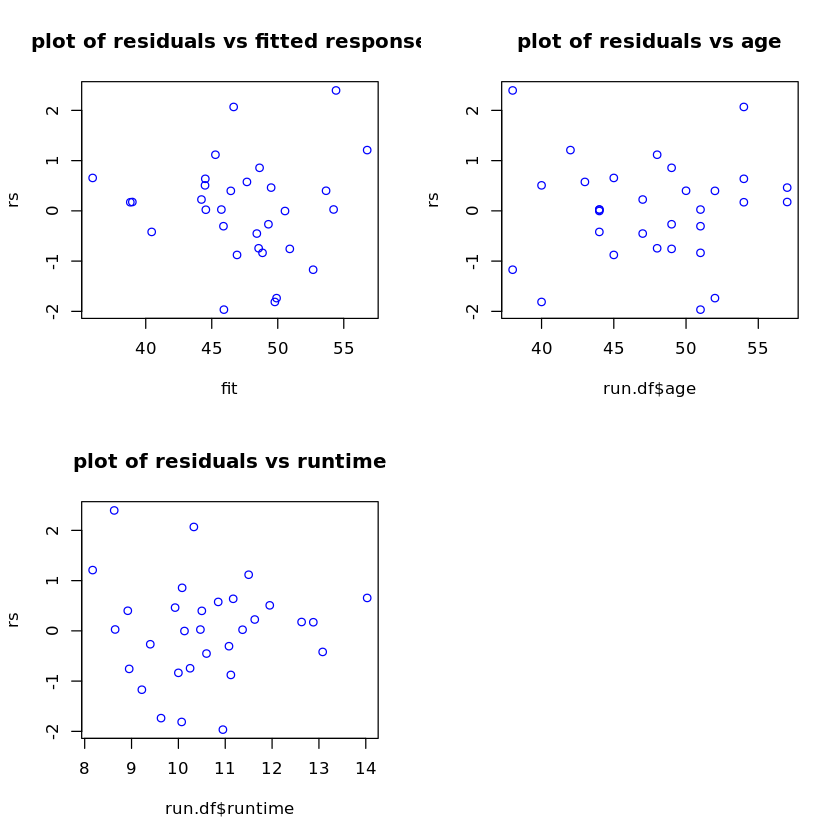

In [13]:
fit <- fitted(run.lm)
rs <- rstandard(run.lm)
par(mfrow=c(2,2))
plot(rs ~ fit, main = "plot of residuals vs fitted response", col = "blue")
plot(rs ~ run.df$age, main = "plot of residuals vs age", col = "blue")
plot(rs ~ run.df$runtime, main = "plot of residuals vs runtime", col = "blue")

There is random distribution of points ( that is, there is absence of a pattern) in the plots hence the data fulfils the linearity criteria

2. Check for normality of (standardized) residuals

    Null hypothesis : standard residuals are normally distributed
    
    Alternative hypothesis : standard residuals are not normally distributed

In [14]:
shapiro.test(rs)   #rs == residuals


	Shapiro-Wilk normality test

data:  rs
W = 0.97322, p-value = 0.6114


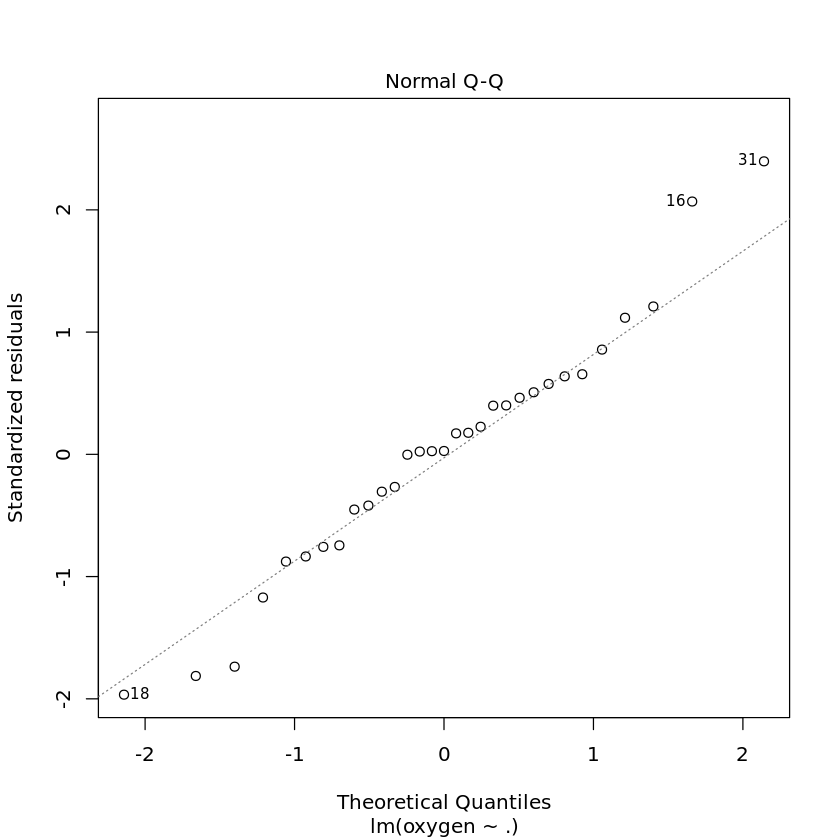

In [15]:
## Q-Q plot
plot(run.lm, which =2)

Since the p-value > 0.05, we will not reject the null hypothesis. Also, majority of the observations lie on the normal qq-plot line. Thus, the normality criteria is fulfilled.

3. Check for constant variance (presence of influential points) using Cook's distance

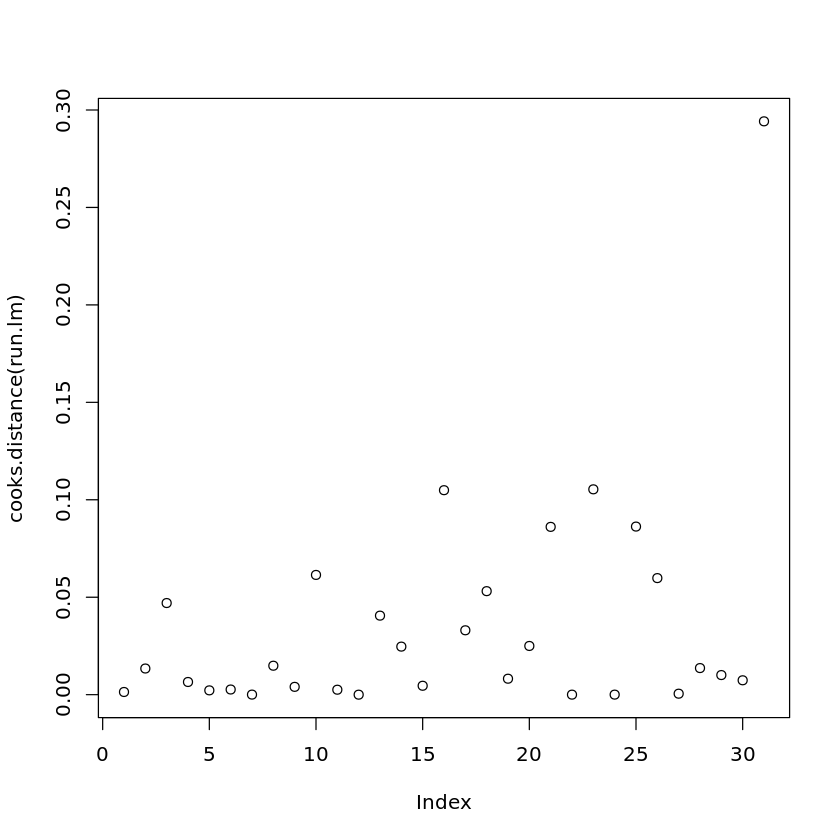

In [16]:
plot(cooks.distance(run.lm))

There is an outlying observation. This observation will be removed from the data and linear regression analysis will be repeated using the new data set. Then, the influence of the outlier point on the regression analysis can be estimated.

In [17]:
## to find the outlying observation
data[which(cooks.distance(run.lm) > 0.25),]

,age,weight,runtime,rstpulse,maxpulse,oxygen
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
31,38,81.87,8.63,48,186,60.055


In [18]:
# Observation 31 is the outlier hence it will be removed from the dataset
data_new <- data[-31,]

In [19]:
# redo regression analysis
data.newLm <- lm(oxygen~.,data_new)
summary(data.newLm)


Call:
lm(formula = oxygen ~ ., data = data_new)

Residuals:
   Min     1Q Median     3Q    Max 
-5.264 -1.169  0.396  1.003  5.120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 109.759963  12.672328   8.661 7.52e-09 ***
age          -0.198644   0.104736  -1.897   0.0700 .  
weight       -0.052260   0.056173  -0.930   0.3615    
runtime      -2.687787   0.390203  -6.888 4.01e-07 ***
rstpulse     -0.005003   0.060766  -0.082   0.9351    
maxpulse     -0.117289   0.058761  -1.996   0.0574 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.41 on 24 degrees of freedom
Multiple R-squared:  0.7966,	Adjusted R-squared:  0.7542 
F-statistic:  18.8 on 5 and 24 DF,  p-value: 1.33e-07


Comparison of regression summary of both datasets indicate that the outlying point is not influential as it did not change the coeffcient of determination (i.e the percentage variablity of oxygen consumption explained by age, maxpulse and runtime). 

### Estimated regression model

In [20]:
run.newLm <- lm(oxygen~age+runtime+maxpulse,run.df)

The estimated regression model is given as **Oxygen = 109.76 - 0.199(age) - 2.688(runtime) - 0.117(maxpulse) + e** 

where e represents the unexplained error 

### Interpretation

This implies that keeping other variables at constant value, we expect a decrease in oxygen consumption by 0.199 mL/kg/min with every 1 unit increase in age.

Also,keeping other variables at constant value, there will be decrease in oxygen consumption by 2.688 mL/kg/min with every 1 minute increase in runtime.

Equally, keeping other variables at constant value, there will be decrease in oxygen consumption by 0.117 mL/kg/min with every 1 unit increase in maxpulse.

The adjusted R square value indicates that approximately 75% variability in oxygen consumption can be explained by age, runtime and maxpulse of the individual.

Therefore, this estimated regression model is good for predictions as it fulfils all the underlying assumptions. Also, the standard error of the model are below 2



### Prediction of mean values

To perform a simple test of the predictive accuracy of the estimated regression model, I will test the model on already known values in the data to check if the prediction will be similar to the actual value of the oxygen consumption level

In [21]:
## data set
head(run.df)

,age,weight,runtime,rstpulse,maxpulse,oxygen
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,57,73.37,12.63,58,176,39.407
2,54,79.38,11.17,62,165,46.080
3,52,76.32,9.63,48,166,45.441
4,50,70.87,8.92,48,155,54.625
5,51,67.25,11.08,48,172,45.118
6,54,91.63,12.88,44,172,39.203


In [22]:
## test the model using observation number 1 in the data set
row1 <- data.frame(age = 57, runtime = 12.63,maxpulse = 176)
pred_CI <- predict(run.newLm, row1, interval = "confidence")
pred_CI

,fit,lwr,upr
1,38.87977,36.45144,41.30809


In [23]:
## test the model using observation number 4
row4 <- data.frame(age = 50, runtime = 8.92,maxpulse = 155)
pred_CI <- predict(run.newLm, row4, interval = "confidence")
pred_CI

,fit,lwr,upr
1,53.56953,51.20186,55.9372


In [24]:
## test the model using observation number 6
row6 <- data.frame(age = 54, runtime = 12.88, maxpulse = 172)
pred_CI <- predict(run.newLm, row6, interval = "confidence")
pred_CI

,fit,lwr,upr
1,39.17818,37.07849,41.27788


Overall, the predicted values are very close to the actual values of oxygen consumption levels in the dataset which indicates that the model  is good for prediction for unknown oxygen consumption levels